In [2]:
import pandas as pd

In [3]:
import numpy as np

# Generate random data for class 0
np.random.seed(0)
class0_x = np.random.normal(2, 1, 50)
class0_y = np.random.normal(2, 1, 50)
class0 = np.column_stack((class0_x, class0_y))

# Generate random data for class 1
class1_x = np.random.normal(6, 1, 50)
class1_y = np.random.normal(6, 1, 50)
class1 = np.column_stack((class1_x, class1_y))

# Combine the data
X = np.vstack((class0, class1))
y = np.hstack((np.zeros(50), np.ones(50)))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


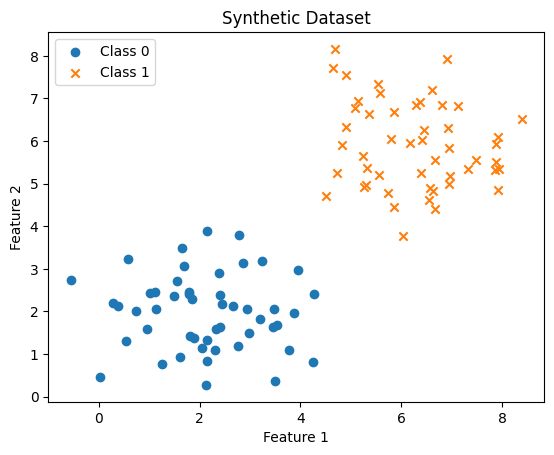

In [5]:
import matplotlib.pyplot as plt

# Plot the dataset
plt.scatter(class0_x, class0_y, label="Class 0", marker="o")
plt.scatter(class1_x, class1_y, label="Class 1", marker="x")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Synthetic Dataset")
plt.show()


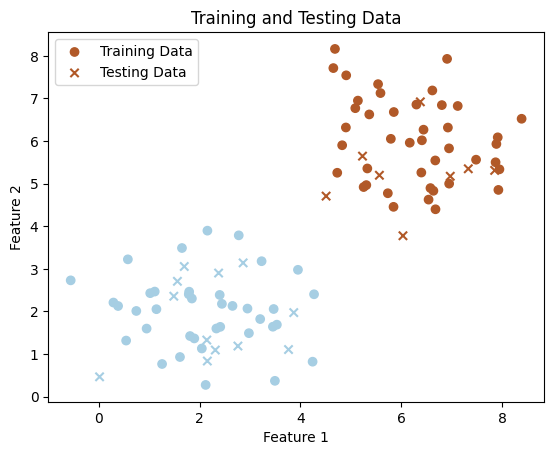

In [6]:
# Plot the training and testing data
plt.scatter(X_train[:, 0], X_train[:, 1], label="Training Data", marker="o", c=y_train, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], label="Testing Data", marker="x", c=y_test, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Training and Testing Data")
plt.show()


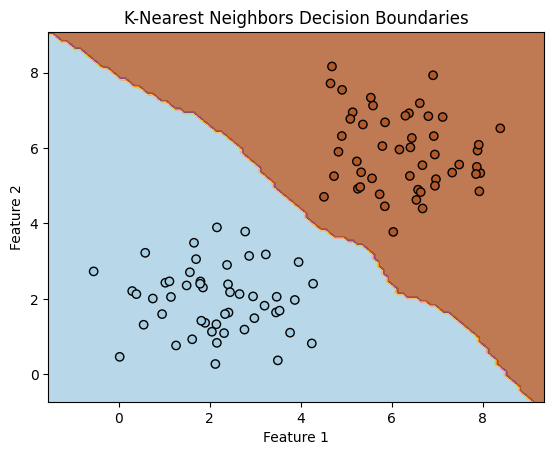

In [7]:
# Create a meshgrid to plot decision boundaries
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Nearest Neighbors Decision Boundaries")
plt.show()


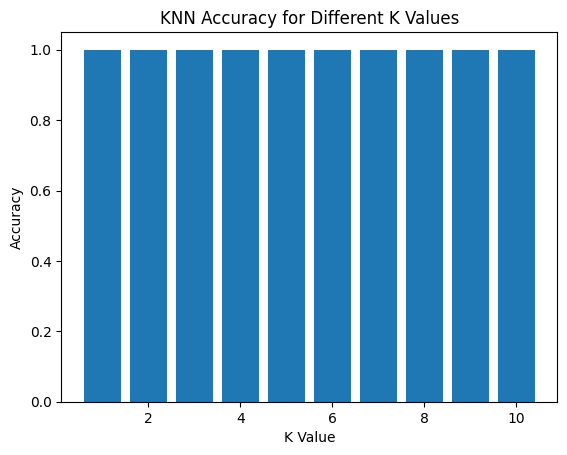

In [8]:
# Calculate the accuracy for different k values
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy as a bar chart
plt.bar(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()


In [9]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Get the feature data (X) and target labels (y)
X = iris.data
y = iris.target

# Get the names of the features
feature_names = iris.feature_names

# Get the target names (class names)
target_names = iris.target_names

# Print some information about the dataset
print("Feature Names:", feature_names)
print("Target Names:", target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)


In [10]:
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\wine_data.csv")
df = df[['class_label', 'alcohol', 'malic_acid']]
df.columns = ['class', 'alcohol', 'malic']

df.sample(5)

,class,alcohol,malic
85,2,12.67,0.98
131,3,12.88,2.99
96,2,11.81,2.12
107,2,12.72,1.75
139,3,12.84,2.96


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaling = MinMaxScaler()

In [13]:
scaling.fit_transform(df[['alcohol','malic']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

<Axes: xlabel='alcohol', ylabel='Count'>

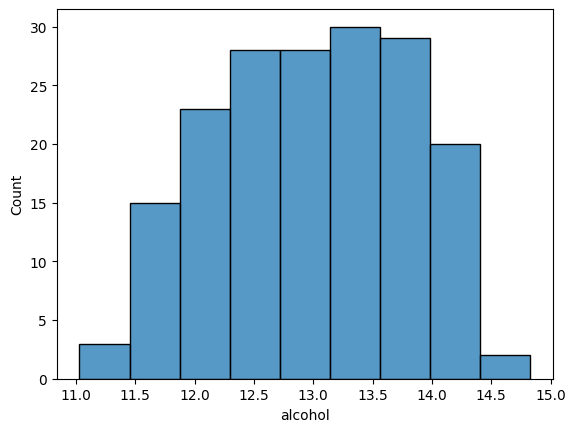

In [14]:
import seaborn as sns

sns.histplot(df['alcohol'])


<Axes: xlabel='malic', ylabel='Count'>

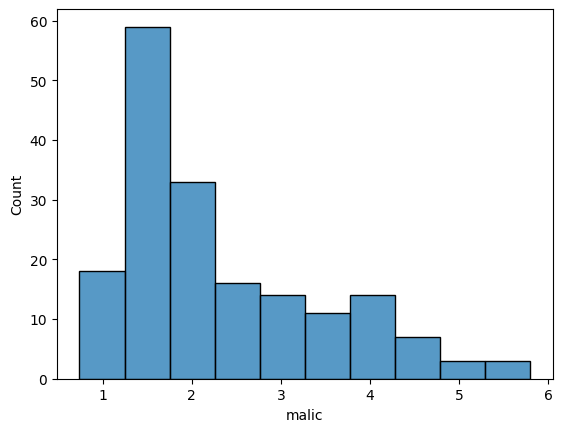

In [15]:
sns.histplot(df['malic'])

In [16]:
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\wine_data.csv")
df = df[['class_label', 'alcohol', 'malic_acid']]
df.columns = ['class', 'alcohol', 'malic']

df.sample(5)

,class,alcohol,malic
140,3,12.93,2.81
31,1,13.58,1.66
1,1,13.20,1.78
27,1,13.30,1.72
166,3,13.45,3.70


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaling = StandardScaler()

In [19]:
scaling.fit_transform(df[['alcohol','malic']])

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

<Axes: xlabel='malic', ylabel='Count'>

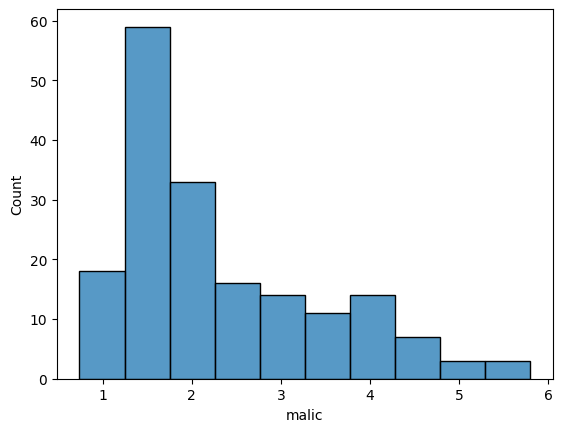

In [20]:
sns.histplot(df['malic'])

<Axes: xlabel='alcohol', ylabel='Count'>

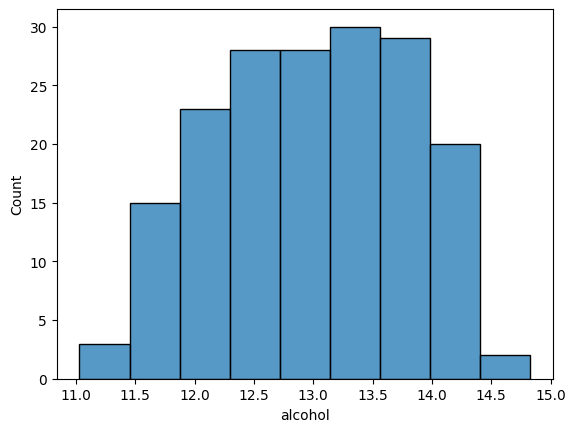

In [21]:
sns.histplot(df['alcohol'])

<Axes: xlabel='alcohol', ylabel='malic'>

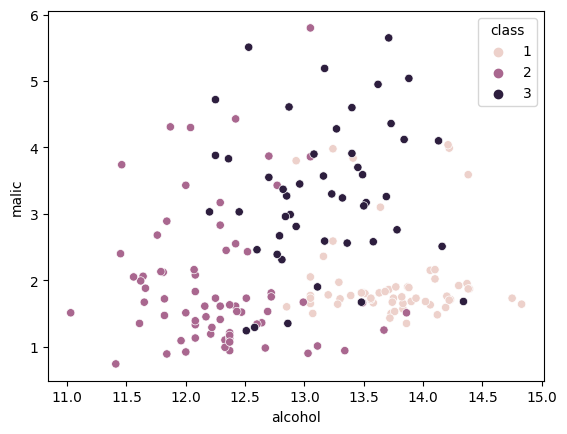

In [22]:
sns.scatterplot(data=df,x='alcohol',y='malic',hue='class')


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Create a synthetic imbalanced dataset
np.random.seed(42)
num_samples = 1000
fraudulent_ratio = 0.02
num_fraudulent = int(fraudulent_ratio * num_samples)

# Generate non-fraudulent transactions
non_fraudulent = np.random.normal(loc=100, scale=20, size=num_samples - num_fraudulent)

# Generate fraudulent transactions (smaller values for demonstration purposes)
fraudulent = np.random.normal(loc=50, scale=10, size=num_fraudulent)

# Combine fraudulent and non-fraudulent transactions
all_transactions = np.concatenate((non_fraudulent, fraudulent))

# Create labels: 0 for non-fraudulent, 1 for fraudulent
labels = np.concatenate((np.zeros(num_samples - num_fraudulent), np.ones(num_fraudulent)))

# Create a DataFrame for the dataset
data = pd.DataFrame({'Transaction Amount': all_transactions, 'Fraudulent': labels})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Transaction Amount']], data['Fraudulent'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.8
Recall: 0.8
Confusion Matrix:
[[194   1]
 [  1   4]]


In [24]:
precision_score(y_test,y_pred)

0.8

In [25]:
recall_score(y_test,y_pred)

0.8

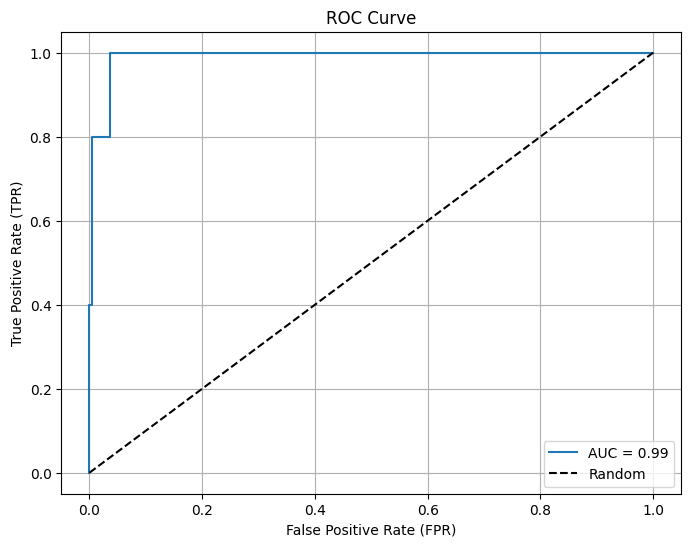

AUC Value: 0.9907692307692307


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make probability predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC Value:", auc_value)


In [29]:
roc_df = pd.DataFrame(zip(fpr,tpr,thresholds),columns = ["FPR","TPR","thresholds"])

In [30]:
roc_df

,FPR,TPR,thresholds
0,0.000000,0.0,inf
1,0.000000,0.2,9.278257e-01
2,0.000000,0.4,7.972446e-01
3,0.005128,0.4,6.955070e-01
4,0.005128,0.8,5.405643e-01
5,0.035897,0.8,5.874492e-02
6,0.035897,1.0,5.645887e-02
7,1.000000,1.0,9.167383e-12


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(smote__ratio=0.1)

TypeError: SMOTE.__init__() got an unexpected keyword argument 'smote__ratio'

In [36]:
generate_auc_roc_curve(y_test,y_pred)

NameError: name 'generate_auc_roc_curve' is not defined